In [140]:
%matplotlib widget
import math
import pywt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import HBox, FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [141]:
plt.rcParams["figure.figsize"] 

[8.0, 4.5]

In [142]:
plt.rcParams["figure.figsize"] = [8,4.5]

In [143]:
w = pywt.Wavelet('db2')

In [144]:
(phi, psi, x) = w.wavefun(level=5)

In [ ]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
line = ax.plot(x, phi)

In [146]:
ax.plot(x, psi)

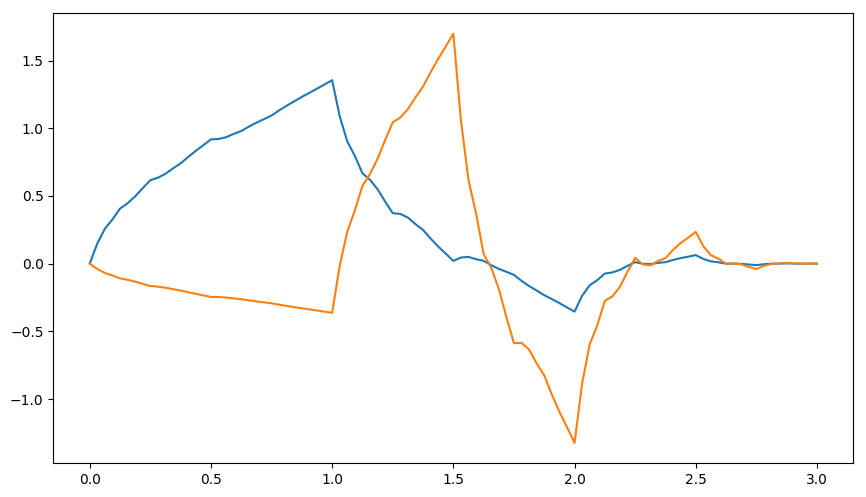

In [147]:
display(fig)

In [148]:
data = []
data_pure = []
data_with_noise = []
data_shifted = []
data_with_sin = []
labels = ['$x^{-1}$', '$x^0$', '$x^1$', '$x^2$', '$x^3$']
labels_shifted = ['$(x-t)^{-1}$', '$(x-t)^0$', '$(x-t)^1$', '$(x-t)^2$', '$(x-t)^3$']
labels_sin = [x + ' + sin(f \pi x) \cdot a$' for x in ['$x^{-1}', '$x^0', '$x^1', '$x^2', '$x^3']]
x = np.linspace(0, 2, 128)
for p in [0.5, 0, 1, 2, 3]:
    y = x**p
    y_noise = x**p + np.random.rand(len(x))*0.1
    y_shifted = (x + 0.5)**p
    y_sin = x**p + np.sin(20 * np.pi * x) * 0.1
    #y = np.concatenate((y, y[:-1][::-1]))
    #y = np.concatenate((y, y[::-1]))
    #y = np.tile(y[:-1],10)
    data_pure.append(y)
    data_with_noise.append(y_noise)
    data_shifted.append(y_shifted)
    data_with_sin.append(y_sin)

data = data_pure
#labels += ['$x + sin(20 \pi x)$']
#x = np.linspace(0, 2, 100)
#y = x + np.sin(20 * np.pi * x) * 0.1
#data.append(y)

In [149]:
data = data_pure

In [150]:
def print_signals(data, labels):
    lines = []
    fig, ax = plt.subplots(1,1)
    ax.set_title("Signals")
    for i in range(len(data)):
        d = data[i]
        l = labels[i]
        line = plt.plot(x, d, label=l)
        lines += line
    plt.legend()
    plt.grid()
    return fig, lines
fig, lines = print_signals(data_pure, labels)

FigureCanvasNbAgg()

In [151]:
#line = ax.plot(np.tile(y,10))

In [152]:
MODE='smooth'
def plot_dwt_result(data, labels, wavelet, ca_axis, cd_axis):
    for n in range(len(data)):
        d = data[n]
        l = labels[n]
        ca, cd = pywt.dwt(d, wavelet, mode=MODE)
        #print(len(d), len(ca), len(cd))
        l_diff = len(ca) - len(d)//2
        start = l_diff
        end = len(ca) - l_diff
        ca = ca[start:end]
        cd = cd[start:end]
        #ca = ca[0:len(d)//2]
        #cd = cd[0:len(d)//2]
        #print(len(d), len(ca), len(cd))
        ca_axis.set_title("Approx. Coef")
        ca_axis.plot(ca, label=l)
        cd_axis.set_title("Detail Coef")
        cd_axis.plot(cd, label=l)
        ca_axis.legend()
        cd_axis.legend()
        
        
def plot_dwt_multi_level(data, labels, wavelet, fig, level=None):
    plots = fig.subplots(level + 1, 1)
    for n_d in range(len(data)):
        d = data[n_d]
        l = labels[n_d]
        coeffs = pywt.wavedec(d, wavelet, mode=MODE, level=level)
        for n in range(len(coeffs)):
            plots[n].plot(coeffs[-(n+1)], label=l)
            print(len(coeffs[-(n+1)]))
    for p in plots:
        p.legend()
        
def plot_dwt_approximation_reconstruction(data, labels, wavelet, ca_axis, cd_axis, reconstruct_axis, error_axis):
    for n in range(len(data)):
        d = data[n]
        l = labels[n]
        ca, cd = pywt.dwt(d, wavelet, mode=MODE)
        print(len(d), len(ca), len(cd))
        reconstruct = pywt.idwt(ca, np.zeros(len(cd)), wavelet, mode=MODE)
        #error = reconstruct[:-1] - d
        error = reconstruct - d
        ca_axis.set_title("Approx. Coef")
        ca_axis.plot(ca, label=l)
        cd_axis.set_title("Detail Coef")
        cd_axis.plot(cd, label=l)
        reconstruct_axis.set_title("Reconstruct w/o Details")
        reconstruct_axis.plot(reconstruct, label=l)
        error_axis.set_title("Reconstruct Error")
        error_axis.plot(error, label=l)

In [153]:
fig = plt.figure()

FigureCanvasNbAgg()

In [154]:
fig.clear()
plot_dwt_multi_level(data_pure[2:5], labels[2:5], 'db2', fig, 3)
fig.tight_layout()
#fig.legend()
#display(fig)

65
34
18
18
65
34
18
18
65
34
18
18


In [155]:
def plot_wavelet_analysis(data, labels, wavelet):
    fig, ax_lst = plt.subplots(2, 1)
    plot_dwt_result(data, labels, wavelet, ax_lst[0], ax_lst[1])
    fig.tight_layout()
    #display(fig)

In [156]:
def plot_fft_result(data, labels, axis, remove_dc):
    for n in range(len(data)):
        d = data[n]
        l = labels[n]
        if remove_dc:
            d = d - np.mean(d)
        fft = np.fft.rfft(d)
        axis.plot(abs(fft), label=l)
        axis.set_title("Fourier Amplituden")
        axis.legend()
        axis.grid()

In [157]:
def plot_fft_analysis(data, labels, remove_dc=False):
    fig, ax_lst = plt.subplots(1, 1)
    plot_fft_result(data, labels, ax_lst, remove_dc)

In [158]:
def plot_differentation(data, labels, n_diff, axis):
    for n in range(len(data)):
        d = data[n]
        l = labels[n]
        diff = np.diff(d, n_diff)
        print("Diff Mean:", np.mean(diff))
        axis.plot(diff, label=l)
        axis.set_title("Differentiation")
        axis.legend()
        axis.grid()
        

In [159]:
def plot_differentation_analysis(data, labels, n_diff):
    fig, axis = plt.subplots(1,1)
    plot_differentation(data, labels, n_diff, axis)

In [160]:
plot_fft_analysis(data_pure[1:], labels[1:])

FigureCanvasNbAgg()

In [161]:
#plot_fft_analysis([5], remove_dc=True)

In [162]:
# Haar Wavlet gibt die erste Ableitung
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db1')
plot_differentation_analysis(data_pure[1:], labels[1:],  1)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

Diff Mean: 0.0
Diff Mean: 0.015748031496062992
Diff Mean: 0.031496062992125984
Diff Mean: 0.06299212598425197


In [163]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db2')

FigureCanvasNbAgg()

In [164]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db3')

FigureCanvasNbAgg()

In [165]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db4')

FigureCanvasNbAgg()

In [166]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db12')

FigureCanvasNbAgg()

In [127]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db20')

FigureCanvasNbAgg()

# Signal mit Sinus

In [134]:
plt.ioff()
plt.clf()

In [135]:
indices = [1,2,3,4]
ps = [-1,0,1,2,3]
fig, lines = print_signals(data_with_sin[1:], labels_sin[1:]);
canvas = fig.canvas

def refresh_plot(a, f):
    for n in range(len(indices)):
        p = ps[indices[n]]
        data_with_sin[indices[n]] = x**p + np.sin(f * np.pi * x) * a
        lines[n].set_data(x, data_with_sin[indices[n]])
    canvas.draw()
    canvas.flush_events()
    
interactive_w = interactive(refresh_plot, a=(0.01, 0.2, 0.01), f=(1,20))

HBox([interactive_w, canvas])

In [167]:
plt.ion()
print_signals(data_with_sin[1:], labels_sin[1:])

FigureCanvasNbAgg()

(<Figure size 800x450 with 1 Axes>,
  <matplotlib.lines.Line2D at 0x7f40d6ba54e0>])

In [168]:
plot_fft_analysis(data_with_sin[1:], labels_sin[1:])

FigureCanvasNbAgg()

In [169]:
plot_wavelet_analysis(data_with_sin[1:], labels_sin[1:], 'db2')

FigureCanvasNbAgg()

# Shifted

In [174]:
print_signals(data_shifted[1:], labels_shifted[1:])

FigureCanvasNbAgg()

(<Figure size 800x450 with 1 Axes>,
  <matplotlib.lines.Line2D at 0x7f40d4435ef0>])

In [170]:
plot_wavelet_analysis(data_shifted[1:], labels[1:], 'db2')

FigureCanvasNbAgg()

In [173]:
plot_fft_analysis(data_pure[1:], labels[1:], remove_dc=True)
plot_fft_analysis(data_shifted[1:], labels[1:], remove_dc=True)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

# Differentation with noise

In [ ]:
print_signals(data_with_noise[1:], labels)

In [ ]:
plot_wavelet_analysis(data_with_noise[1:], labels[1:], 'db1')
plot_differentation_analysis(data_with_noise[1:], labels[1:], 1)
plot_fft_analysis(data_with_noise[1:], labels[1:], )

In [ ]:
plot_wavelet_analysis('db2', [1,2,3,4])
plot_differentation_analysis([1, 2, 3, 4], 2)

In [ ]:
plot_wavelet_analysis('db3', [3,4])
plot_differentation_analysis([3, 4], 3)

# Zero padding

In [180]:
data_zero_padded = []
data_zero_padded_labels = []
padding = 50
x_padded = x[:len(x)-padding]

y = np.concatenate((np.zeros(padding), x_padded))
data_zero_padded.append(y)
data_zero_padded_labels.append('$x$')

y = np.concatenate((np.zeros(padding), np.sin(x_padded * 2 * np.pi)))
data_zero_padded.append(y)
data_zero_padded_labels.append('$sin(2 \pi x)$')

y = np.concatenate((np.zeros(padding), np.sin(x_padded * 10 * np.pi)))
data_zero_padded.append(y)
data_zero_padded_labels.append('$sin(10 \pi x)$')

y = np.concatenate((np.zeros(padding), np.sin(x_padded * 20 * np.pi)))
data_zero_padded.append(y)
data_zero_padded_labels.append('$sin(20 \pi x)$')

In [181]:
print_signals(data_zero_padded, data_zero_padded_labels)

FigureCanvasNbAgg()

(<Figure size 800x450 with 1 Axes>,
  <matplotlib.lines.Line2D at 0x7f40d4370e80>])

In [182]:
plot_fft_analysis(data_zero_padded, data_zero_padded_labels)
plot_fft_analysis(data_pure[2:3], labels[2:3])
plot_wavelet_analysis(data_zero_padded, data_zero_padded_labels, 'db1')

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

# Sinus mit Noise

In [183]:
data_sin_with_noise = []
data_sin_with_noise_labels = []
noise = 1

y = data_zero_padded[1] + (np.random.rand(len(x)) - 0.5) * noise
data_sin_with_noise.append(y)
data_sin_with_noise_labels.append('$sin(x 2 \pi) + rand$')

y = data_zero_padded[2] + (np.random.rand(len(x)) - 0.5) * noise
data_sin_with_noise.append(y)
data_sin_with_noise_labels.append('$sin(x 10 \pi) + rand$')

y = data_zero_padded[3] + (np.random.rand(len(x)) - 0.5) * noise
data_sin_with_noise.append(y)
data_sin_with_noise_labels.append('$sin(x 20 \pi) + rand$')


In [184]:
print_signals(data_sin_with_noise, data_sin_with_noise_labels)

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

(<Figure size 800x450 with 1 Axes>,
  <matplotlib.lines.Line2D at 0x7f40d4097470>])

In [185]:
plot_fft_analysis(data_sin_with_noise, data_sin_with_noise_labels)

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [186]:
plot_wavelet_analysis(data_sin_with_noise[0:1], data_sin_with_noise_labels[0:1], 'db2')

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [187]:
plot_wavelet_analysis(data_sin_with_noise[1:2], data_sin_with_noise_labels[1:2], 'db2')

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [188]:
plot_wavelet_analysis(data_sin_with_noise[2:3], data_sin_with_noise_labels[2:3], 'db2')

/home/roughl/.virtualenvs/mathsem/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()